<a href="https://colab.research.google.com/github/jong104b-kr/AIFFEL_quest_cr/blob/master/Exploration/Quest02/250411_ExCR12_quest02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 파이선 패키지 관리자인 pip를 사용하여 summa 라이브러리를 설치함
# summa는 텍스트 요약 기능을 제공함
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=fc3d3e8196e06ca06b1e5d3820463c5d77a78e6cff91385ade0af96851320710
  Stored in directory: /root/.cache/pip/wheels/10/2d/7a/abce87c4ea233f8dcca0d99b740ac0257eced1f99a124a0e1f
Successfully built summa


In [2]:
import nltk         # Natural Language ToolKit을 임포트함. NTLK는 자연어 처리 작업을 위한 다양한 도구와 데이터셋 제공
import tensorflow   # Tensorflow 임포트함, 텐서플로우는 머신러닝과 딥러닝 모델을 구축하고 훈련하기 위한 오픈소스 프레임워크
import summa        # 텍스트 요약 라이브러리 임포트함.
import pandas as pd # 판다스를 임포트함, 데이터 분석과 조작을 위한 강력한 라이브러리
import numpy as np  # 넘파이 임포트함, 수치계산을 위한 라이브러리로 다차원 배열 객체와 이를 다루는 도구를 제공함
import os           # 운영체제와 상호작용하기 위한 모듈을 임포트함, 파일 및 디렉터리 작업을 쉽게 할 수 있음
import re           # 정규표현식(Regular Expression) 모듈을 임포트함, 문자열 패턴 매칭과 처리를 위한 기능을 제공함
# 데이터 시각화를 위한 라이브러리를 임포트함
import matplotlib.pyplot as plt
# NLTK의 stopwords 모듈을 임포트함, 자주 사용되는 단어들(the,is,in 등)을 제거하는데 사용함
from nltk.corpus import stopwords
# BeautifulSoup 라이브러리를 임포트함, HTML 및 XML문서를 파싱하고 데이터를 추출하는데 유용함.
from bs4 import BeautifulSoup
# Tensorflow의 Tokenizer 클래스를 임포트함, 이 클래스는 텍스트 데이터를 토큰화하고 정수인코딩하는데 사용함
from tensorflow.keras.preprocessing.text import Tokenizer
# Tensorflow의 pad_sequences 함수를 임포트함, 이 함수는 시퀀스 데이터를 일정한 길이로 패딩하는데 사용함
from tensorflow.keras.preprocessing.sequence import pad_sequences
# url을 통해 웹페이지 내용을 가져오는 urllib.request모듈을 임포트함
import urllib.request
# 경고 메세지를 처리하기 위한 warnings 모듈을 임포트함, 이 모듈을 사용하면 런타임 경고 메세지를 필터링하거나 무시할 수 있음.
import warnings

# NLTK 라이브러리에서 제공하는 stopwords 데이터를 다운로드함
nltk.download('stopwords')

# 불필요한 경고 메시지 무시
# BeautifulSoup 모듈에서 발생하는 UserWarning 경고를 무시하도록 설정함
# 특정 경고메세지를 무시하여 HTML파싱 중 예상되는 경미한 문제 넘어감
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

# 라이브러리 버전 출력
print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)


3.9.1
2.18.0
2.2.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#파이선 버전 확인
!python --version

Python 3.11.12


In [4]:
import urllib.request
# 이 함수는 주어진 URL에서 파일을 다운로드 하고 로컬디스크에 저장함, news_summary_more.csv 파일을 지정된 url에서 다운로드하여
# 현재 디렉토리에 ./news_summary_more.csv 이름으로 저장함.
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="./news_summary_more.csv")

# 판다스 라이브러리를 사용하여 csv파일을 읽어 DataFrame객체로 로드함, 파일이 utf-8로 되어있음을 명시함.
data = pd.read_csv('./news_summary_more.csv', encoding='utf-8')

In [5]:
data.sample(10) # 샘플 확인

,headlines,text
15394,Elon Musk's net worth falls by $1.6 billion af...,Tesla CEO Elon Musk's fortune dropped by $1.6 ...
27462,Warner who can never lead an Aus side to capta...,"David Warner, who has been banned for life fro..."
40639,4 bank employees booked in alleged scam of â¹...,The Rajasthan police has registered a case aga...
63349,Scientists propose using spider silk to improv...,US-based researchers have suggested that spide...
56788,India's GDP growth to rise to 7.2% in 2018: UN...,The Indian economy is likely to expand 7.2% in...
57811,Bombay HC restrains Mumbai Metro from hiking f...,The Bombay High Court on Monday restrained the...
16144,UN has no right to interfere in Myanmar: Armed...,Criticising a UN report on the Rohingya crisis...
37474,1st Japanese royal visits Russia in 100 years ...,Japan's Princess Hisako has become the first m...
54420,"18,000 kg of avocados spilled onto US highway","Nearly 18,000 kg of avocados spilled onto a hi..."
11692,Intelligent apparel startup Turms raises â¹6....,Bengaluru-based intelligent apparel brand Turm...


In [6]:
# 컬럼 이름 변경
# headlines → Summary, text → Text로 변경, 변경사항을 원본 Dataframe에 바로 적용함
data.rename(columns={'headlines': 'Summary', 'text': 'Text'}, inplace=True)

# 컬럼 순서 변경
data = data[['Text', 'Summary']]

In [7]:
data.sample(10) # 임의로 10개의 행을 샘플링하여 출력함, 데이터셋의 일부를 빠르게 확인할 수 있음.

,Text,Summary
82712,EU's Budget Commissioner GÃ¼nther Oettinger ha...,Brexit could create â¬20 bn gap in EU budget:...
54854,"While talking about struggles in her career, P...",Been thrown out of films for someone's girlfri...
58796,Reacting to Congress Vice-President Rahul Gand...,Congress clapped on Hafiz Saeed's release: PM ...
44641,During Himachal Pradesh Assembly's budget sess...,Dead employees among Himachal govt's list of t...
49155,Tamil Nadu Cooperatives Minister Sellur Raju h...,Only AIADMK cardholders will get govt help: TN...
59503,Hindustan Unilever CEO Sanjiv Mehta said that ...,"HUL to lower prices by 7-10%, in line with GST..."
52018,Hollywood actor Kevin Spacey has been accused ...,"Spacey accused of making racist ""n***ers"" rema..."
13528,Ahead of the assembly elections in Madhya Prad...,Ex-BJP MLA Sunil Mishra joins Congress in poll...
54042,Following the Bhima Koregaon clashes in Mahara...,'Fascist' BJP wants Dalits to remain at the bo...
7409,Uttar Pradesh CM Yogi Adityanath on Wednesday ...,BJP can fight Naxals like Lord Rama fought dem...


In [8]:
# 전처리 functions
# contractions는 약어와 그에 해당하는 풀어서 쓴 형태를 매핑한 사전을 정의함, 이러한 약어 사전은 나중에 텍스트 전처리 과정에서 약어를 정규화하는데 사용함
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

# contradiction 사전에 포함된 항목의 수를 출력함, 약어사전의 크기를 확인하는데 사용함.
print("정규화 사전의 수: ", len(contractions))


# 데이터 전처리 함수 정의, 입력된 텍스트 데이터를 전처리하는 역할을 함
def preprocess_text(text, remove_stopwords=True):
    """텍스트 데이터를 전처리합니다.

    Args:
        text (str): 전처리할 텍스트 데이터.
        remove_stopwords (bool): 불용어를 제거할지 여부. 기본값은 True.

    Returns:
        str: 전처리된 텍스트 데이터.
    """
    text = text.lower()  # 입력된 텍스트를 소문자화
    text = BeautifulSoup(text, "lxml").text  # HTML 태그 제거, XML파서를 사용하여 HTML을 파싱함.
    text = re.sub(r'\([^)]*\)', '', text)  # 정규표현식을 사용하여 괄호로 감싸진 모든 문자열을 제거함.
    text = re.sub('"', '', text)  # 쌍따옴표 제거함.
    # 텍스트를 공백을 기준으로 분리한 후 각 단어가 contradictions 사전에 있는지 확인하고 있다면 해당값으로 대체함, 약어를 정규화하는 과정.
    text = ' '.join([contractions[t] if t in contractions else t for t in text.split(" ")])  # 약어 정규화
    text = re.sub(r"'s\b", "", text)  # 소유격 s 제거
    text = re.sub("[^a-zA-Z]", " ", text)  # 영어 외 문자 공백으로 변환
    text = re.sub('[m]{2,}', 'mm', text)  # m이 3개 이상이면 2개로 변경

    # remove_stopwords 매개변수가 True일 경우 불용어를 제거, 그렇지 않으면 그대로 둔다. 여기서 불용어는 NLTK의 stopwords 목록에서 가져옴.
    # 불용어란 : https://m.blog.naver.com/datapreprep/223761542939 참고
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in text.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in text.split() if len(word) > 1)
    return tokens

# 함수정의, 주어진 최대 길이보다 작은 샘플의 비율을 계산하는 역할
def below_threshold_len(max_len, nested_list):
    """샘플 길이가 임계값 이하인 비율을 계산합니다.

    Args:
        max_len (int): 최대 길이.
        nested_list (list): 샘플 리스트.

    Returns:
        float: 임계값 이하인 샘플 비율.
    """
    # 이 코드는 nested_list 내의 각 샘플 s에 대해 s.split()의 길이가 max_len 이하인 경우를
    # 세어 비율을 계산함, split()은 문자열을 공백을 기준으로 분리하는 메서드임.
    ratio = sum(1 for s in nested_list if len(s.split()) <= max_len) / len(nested_list)
    # 계산된 비율을 출력함, 이를 통해 전체 샘플 중 최대 길이 이하의 샘플이 차지하는 비율을 확인할 수 있음.
    print(f'전체 샘플 중 길이가 {max_len} 이하인 샘플의 비율: {ratio}')
    return ratio

정규화 사전의 수:  120


In [9]:
# data 데이터프레임의 Text 컬럼에서 중복된 데이터를 제외하고 남은 고유한 샘플의 수를 출력함.
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
# data 데이터프레임의 Summary 컬럼에서 중복된 데이터를 제외하고 남은 고유한 샘플의 수를 출력함.
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [10]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다(=원본에 적용함)
# Text컬럼을 기준으로 데이터프레임에서 중복된 행을 제거함.
data.drop_duplicates(subset = ['Text'], inplace=True)
# 중복 제거 후 전체 샘플의 수를 출력함
print('전체 샘플수 :', (len(data)))

# 데이터프레임의 각 컬럼에 대해 결측치(null값)의 개수를 출력함.
print (data.isnull().sum ())

# 이 조건문은 데이터프레임에 결측치가 있는지 확인함,결측치가 하나라도 있으면 다음 코드 블록이 실행됨.
if data.isnull().values.any():
    # 빈 값을 Null 값으로 변환(nan, not a number, 결측치를 나타내는 넘파이 객체)
    data.replace('', np.nan, inplace=True)
    # 이 코드는 결측치가 있는 행을 제거(행:0,열:1)
    data.dropna(axis=0, inplace=True)
    # 앞선 코드와 동일하게 결측치가 있는 행을 한번 더 제거하여 데이터프레임을 정제함
    data = data.dropna()
    print(f"after data.isnull().values.any()")

# 위의 코드는 데이터 전처리 과정에서 중복을 제거하고, 결측치 처리 등을 수행하여 데이터를 정제하는 과정을
# 보여줌, 데이터의 품질을 높이고, 분석 및 모델링을 위한 준비를 완료하는 단계

# --- 데이터 전처리 적용 ---
# data 데이터프레임의 Text컬럼에 대해 preprocess_text 함수를 적용함, 이 함수는 앞서 정의된 텍스트 전처리 함수로
# 각 텍스트 데이터를 소문자화, HTML제거, 약어 정규화, 불필요한 문자 제거 등의 작업을 수행함, 마지막은 불용어를 제거하라는 의미
data['Text'] = data['Text'].apply(lambda text: preprocess_text(text, remove_stopwords=True))
# 동일한 함수를 적용하지만 요약에서는 불용어를 제거하지 않음, 문맥상 중요한 단어가 불용어로 간주될 수 있기 때문.
data['Summary'] = data['Summary'].apply(lambda summary: preprocess_text(summary, remove_stopwords=False))

# 텍스트와 요약 데이터의 길이 분포 확인
# data['Text']의 각 텍스트를 공백을 기준으로 분리한 후 각 텍스트의 단어수를 리스트로 저장함.
# 텍스트 데이터의 길이분포를 파악하기 위한 준비단계
text_lengths = [len(s.split()) for s in data['Text']]
# data['Summary']에도 동일한 작업 적용
summary_lengths = [len(s.split()) for s in data['Summary']]

전체 샘플수 : 98360
Text       0
Summary    0
dtype: int64


텍스트 길이 통계:
  최소 길이: 1
  최대 길이: 60
  평균 길이: 35.10

요약 길이 통계:
  최소 길이: 1
  최대 길이: 16
  평균 길이: 9.30


<ipython-input-11-1b0a9e9f60f0>:32: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 서브 플롯 간의 간격을 조정하여 레이아웃을 깔끔하게 만듬.
<ipython-input-11-1b0a9e9f60f0>:32: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 서브 플롯 간의 간격을 조정하여 레이아웃을 깔끔하게 만듬.
<ipython-input-11-1b0a9e9f60f0>:32: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 서브 플롯 간의 간격을 조정하여 레이아웃을 깔끔하게 만듬.
<ipython-input-11-1b0a9e9f60f0>:32: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 서브 플롯 간의 간격을 조정하여 레이아웃을 깔끔하게 만듬.
<ipython-input-11-1b0a9e9f60f0>:32: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 서브 플롯 간의 간격을 조정하여 레이아웃을 깔끔하게 만듬.
<ipython-input-11-1b0a9e9f60f0>:32: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sa

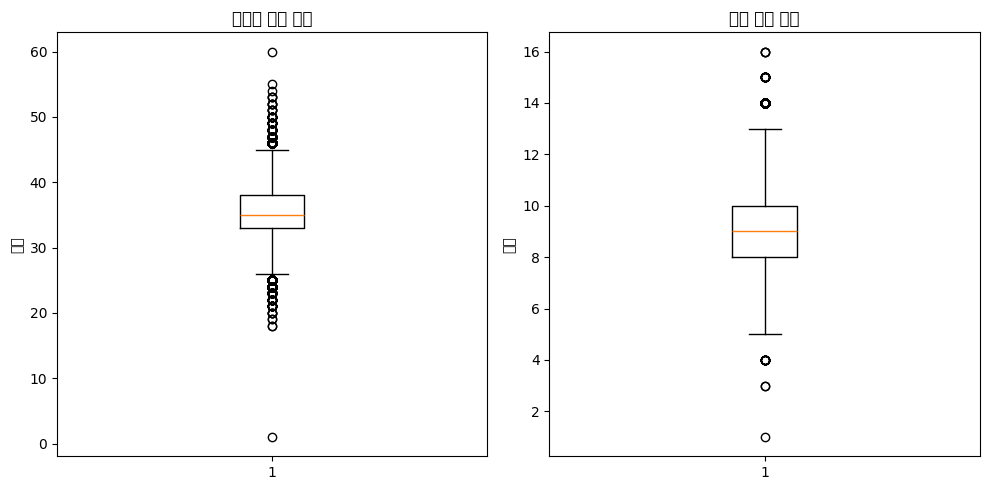

<ipython-input-11-1b0a9e9f60f0>:49: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1b0a9e9f60f0>:49: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1b0a9e9f60f0>:49: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1b0a9e9f60f0>:49: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1b0a9e9f60f0>:49: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1b0a9e9f60f0>:49: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1b0a9e9f60f0>:49: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

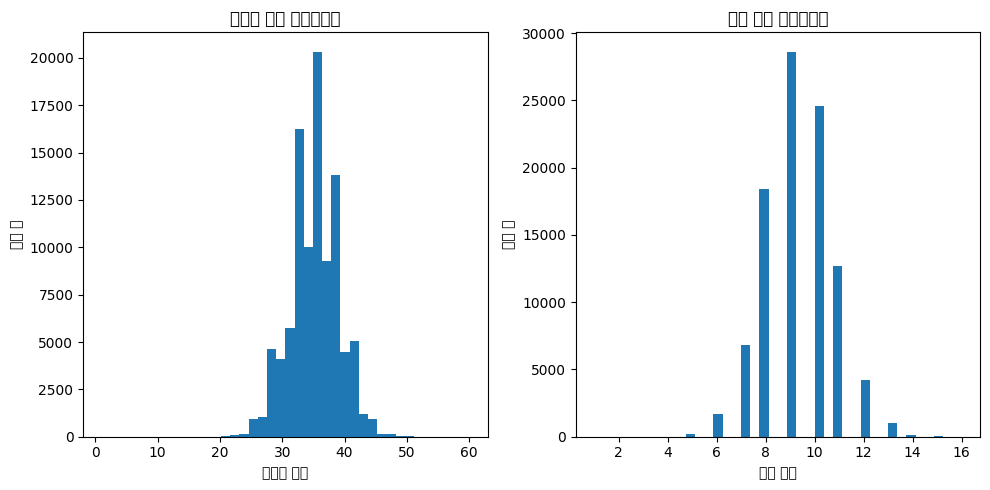

In [11]:
# 함수정의, 텍스트와 요약 데이터의 길이 통계량을 출력하고, 시각화하는 역할을 함.
def analyze_text_length(text_lengths, summary_lengths):
    """
    텍스트와 요약의 길이 통계량을 출력하고, 길이에 대한 박스 플롯과 히스토그램을 시각화합니다.

    Args:
        text_lengths (list): 텍스트 데이터의 길이 목록.
        summary_lengths (list): 요약 데이터의 길이 목록.
    """
    # np.min, np.max, np.mean 함수는 각각 최소값, 최대값, 평균값을 계산하는 numpy함수
    print('텍스트 길이 통계:')
    print(f'  최소 길이: {np.min(text_lengths)}')
    print(f'  최대 길이: {np.max(text_lengths)}')
    print(f'  평균 길이: {np.mean(text_lengths):.2f}') # 평균 길이는 소수점 2자리까지 표시
    print('\n요약 길이 통계:')
    print(f'  최소 길이: {np.min(summary_lengths)}')
    print(f'  최대 길이: {np.max(summary_lengths)}')
    print(f'  평균 길이: {np.mean(summary_lengths):.2f}') # 평균 길이는 소수점 2자리까지 표시

    # 박스 플롯 시각화
    plt.figure(figsize=(10, 5)) # 그림의 크기를 지정함
    plt.subplot(1, 2, 1) # 하나의 그림에 여러 개의 서브플롯을 생성함. 1행 2열의 첫 번째 서브플롯을 생성.
    plt.boxplot(text_lengths) # boxplot 사용해 텍스트 데이터의 길이 분포를 박스 플롯으로 그림.
    plt.title('텍스트 길이 분포')
    plt.ylabel('길이')

    plt.subplot(1, 2, 2) # 두 번째 서브플롯 생성
    plt.boxplot(summary_lengths) # 요약 데이터 길이 분포를 박스플롯으로 그림.
    plt.title('요약 길이 분포')
    plt.ylabel('길이')

    plt.tight_layout() # 서브 플롯 간의 간격을 조정하여 레이아웃을 깔끔하게 만듬.
    plt.show() # 그래프를 화면에 표시함.

    # 히스토그램 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(text_lengths, bins=40) # 히스토그램을 그림.
    plt.title('텍스트 길이 히스토그램')
    plt.xlabel('텍스트 길이')
    plt.ylabel('샘플 수')

    plt.subplot(1, 2, 2)
    plt.hist(summary_lengths, bins=40)
    plt.title('요약 길이 히스토그램')
    plt.xlabel('요약 길이')
    plt.ylabel('샘플 수')

    plt.tight_layout()
    plt.show()

# 함수 호출
analyze_text_length(text_lengths, summary_lengths)

In [12]:

# Text 35정도가 적당할까 싶긴 했지만 30-40 사이 -> 40
# Summary 도  9 할까 싶긴 했지만 8-10 사이 -> 10

# 최대 길이 설정
max_text_length = 40 # 텍스트의 최대 길이를 40으로 설정함, 전처리된 샘플이 40단어를 초과하지 않도록 하는 기준.
max_summary_length = 10 # 요약 데이터의 최대 길이를 10으로 설정함, 요약 텍스트가 10단어를 넘지 않도록 하기 위한 기준.

# 임계값 이하인 샘플 비율 계산
# 앞서 정의한 함수를 호출하여 텍스트와 요약 데이터 중 각각 설정한 최대 길이보다 작은 샘플의 비율을 계산하고 출력함.
# 이 함수는 데이터셋에서 특정 길이 제한을 초과하는 샘플의 비율을 확인하는데 사용됨.
below_threshold_len(max_text_length, data['Text'])
below_threshold_len(max_summary_length, data['Summary'])

# 조건에 맞는 샘플만 필터링하여 새로운 데이터프레임을 생성함.
# 이 코드는 data 데이터프레임에서 텍스트와 요약 데이터가 각각 max_text_length, max_summary_length를 초과하지 않는
# 경우에만 포함되도록 필터링함. &연산자를 사용하여 두 조건이 모두 참인 경우에만 필터링함.
filtered_news_df = data[
    data['Text'].apply(lambda x: len(x.split()) <= max_text_length) &
    data['Summary'].apply(lambda x: len(x.split()) <= max_summary_length)
]

# 결과 출력
print(f"필터링 전 샘플 수: {len(data)}")
print(f"필터링 후 샘플 수: {len(filtered_news_df)}")

# 위 코드는 데이터 전처리 과정에서 텍스트와 요약 데이터의 길이를 제한하여 모델 학습에 적합한
# 데이터셋을 준비하는 과정을 보여줌, 최대 길이를 설정하고, 이를 초과하는 데이터를 제거함으로써
# 모델이 처리할 수 있는 범위를 제한하고, 데이터의 일관성을 유지하는 데 목적이 있음. 또한, 필터링 전후의
# 데이터셋 크기를 비교하여 데이터 손실 정도를 확인할 수 있음.

전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.9238714924766165
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8162972753151687
필터링 전 샘플 수: 98360
필터링 후 샘플 수: 74102


In [13]:
data.head() # 데이터 프레임의 상위 5개행을 출력함.

,Text,Summary
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...
1,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...
4,speaking sexual harassment allegations rajkuma...,have known hirani for yrs what if metoo claims...


In [14]:
data.isnull().sum() # DataFrame 내에 있는 결측치의 총 수를 컬럼별로 출력함.

,0
Text,0
Summary,0


In [15]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
# 요약 데이터에 시작 토큰을 추가함. 이는 시퀀스 예측 모델에서 입력 시퀀스의 시작을 알리는 역할을 함.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
# 요약 데이터에 종료 토큰을 추가함. 이는 시퀀스 예측 모델에서 출력 시퀀스의 종료를 알리는 역할을 함.
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,speaking sexual harassment allegations rajkuma...,have known hirani for yrs what if metoo claims...,sostoken have known hirani for yrs what if met...,have known hirani for yrs what if metoo claims...


In [16]:
encoder_input = np.array(data['Text']) # 텍스트 데이터를 넘파일 배열로 변환하여 인코더의 입력으로 사용함.
decoder_input = np.array(data['decoder_input']) # 요약 데이터(디코더)의 입력을 넘파이 배열로 변환함.
decoder_target = np.array(data['decoder_target']) # 요약 데이터(디코더)의 레이블을 넘파이 배열로 변환함.

In [17]:
# 데이터 샘플의 인덱스를 생성하고, 이를 무작위로 섞음.
# 이는 데이터셋을 셔플링하여 훈련 및 검증세트를 나누기 전에 데이터의 순서를 랜덤하게 만드는 과정임.
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[63814 29867 81584 ... 32685 38397 90578]


In [18]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [19]:
# 전체 데이터의 20%를 검증 데이터로 설정함, 이 값은 데이터셋을 훈련 세트와 검증 세트로 나눌 때 사용됨.
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19672


In [20]:
# 훈련 데이터를 분리함, 전체 데이터에서 검증 데이터를 제외한 나머지를 훈련 데이터로 사용함.
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

# 검증 데이터를 분리함, 전체 데이터의 마지막 20%를 검증 데이터로 사용함
encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

# 훈련 데이터와 검증 데이터 개수를 출력하여 데이터 분할이 올바르게 이루어졌는지 확인함.
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

# 위 코드는 시퀀스-투-시퀀스 모델을 위한 데이터셋을 준비하는 과정을 보여줌.
# 데이터에 시작 및 종료 토큰을 추가하였고, 데이터를 훈련 세트와 검증 세트로 분리한 후,
# 각 세트의 크기를 출력하여 데이터 전처리가 완료되었음을 확인함.
# 이 과정은 모델 학습을 위한 데이터 준비의 마지막 단계로 볼 수 있음.

훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19672
테스트 레이블의 개수 : 19672


In [21]:
# 토크나이저 객체 생성, 이 객체는 텍스트 데이터를 토큰화하고 정수 인코딩하는데 사용됨.
src_tokenizer = Tokenizer()
# 훈련 데이터로부터 단어집합(vocabulary)을 생성함, 이 과정에서 텍스트 데이터에 포함된 모든 단어를 기록하고 각 단어에 고유한 정수를 할당함.
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [22]:
# 토크나이저의 단어 인덱스 중 처음 5개를 출력함, src_tokenizer.word_index는 단어와 정수를 매핑한 사전이며 이 사전의 일부 항목을 확인하여
# 토크나이저가 단어를 어떻게 인코딩했는지 살펴볼 수 있음.
print(list(src_tokenizer.word_index.items())[:5])

[('said', 1), ('india', 2), ('year', 3), ('added', 4), ('us', 5)]


In [23]:
threshold = 7 # 희귀 단어를 판별하기 위한 임계값, 7번 미반 등장할 경우 희귀단어.
total_cnt = len(src_tokenizer.word_index) # 전체 단어 집합의 크기. 토크나이저가 기록한 고유한 단어의 총 수.
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 전체 데이터에서 단어가 등장한 빈도수의 총합을 계산하기 위한 변수 초기화
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
# word_counts는 각 단어와 그 단어의 등장 빈도를 포함하는 사전.
# 이 루프는 각 단어와 빈도수에 대해 반복하면서 필요한 계산을 수행함.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면,
    # 희귀 단어로 간주하고 관련 카운터를 증가시킴.
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt) # 단어 집합의 크기 출력
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt)) # 희귀 단어의 수를 출력
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt)) # 희귀 단어를 제외한 후 단어 집합의 크기 출력
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100) # 전체 단어 중에서 희귀 단어가 차지하는 비율을 백분율로 출력
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100) # 전체 단어 빈도수 중에서 희귀 단어의 빈도수가 차지하는 비율을 백분율로 출력

# 위 코드는 텍스트 데이터의 토크나이징 과정과 희귀 단어를 식별하여 데이터 전처리를 완료하는 과정을 보여줌.
# 토크나이저는 텍스트를 정수 시퀀스로 변환하고, 희귀 단어를 식별하여 데이터의 품질을 높이는데 기여를 함.
# 희귀 단어는 모델 학습에 영향을 줄 수 있으므로, 이를 제거하거나 임계값을 조정하여 데이터셋을 정제할 수 있음.

단어 집합(vocabulary)의 크기 : 69673
등장 빈도가 6번 이하인 희귀 단어의 수: 47494
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 22179
단어 집합에서 희귀 단어의 비율: 68.16700874083217
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.4950393713905332


In [24]:
src_vocab = 15000 # 소스 단어 집합의 최대 크기를 15,000으로 설정함. 이는 모델이 고려할 단어의 최대수를 제한하는 역할을 함.
# Tokenizer 객체를 생성하지만 num_words 매개변수를 사용하여 단어 집합의 크기를 15,000으로 제한함.
# 이는 텍스트 데이터를 토큰화하고 정수 인코딩할 때 사용될 단어 집합의 최대 크기를 정의함.
src_tokenizer = Tokenizer(num_words=src_vocab)
# 훈련데이터로부터 단어 집합을 생성함. 이 과정에서 텍스트 데이터에 포함된 모든 단어를 기록하고, 각 단어에 고유한 정수를 할당함.
src_tokenizer.fit_on_texts(encoder_input_train)

In [25]:
# 훈련 데이터의 텍스트 시퀀스를 정수 시퀀스로 변환함. 각 단어는 사전에 정의된 단어 인덱스에 따라 정수로 변환됨.
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
# 검증 데이터에 대해서도 동일한 변환을 수행함. 이 과정은 모델이 텍스트 데이터를 처리할 수 있도록 준비하는 중요한 단계
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 변환된 정수 시퀀스의 처음 3개를 출력하여 변환이 제대로 이루어졌는지 확인함.
print(encoder_input_train[:3])

[[7, 8390, 1101, 2224, 562, 69, 193, 9847, 810, 5770, 463, 2966, 3433, 562, 227, 332, 4654, 811, 13353, 3659, 607, 714, 7079, 299, 2123, 7578, 1192, 1428, 2071, 6, 915, 76, 1428, 4048, 244, 2090, 1781], [83, 326, 545, 382, 332, 895, 397, 533, 47, 425, 194, 253, 9, 9, 2008, 422, 5158, 2653, 7380, 6, 623, 12, 845, 2633, 144, 141, 113, 296, 10, 1143, 4183, 5158, 1457], [2414, 194, 7080, 6999, 1, 8151, 3753, 1610, 3209, 14, 3294, 4, 2046, 6999, 36, 1, 944, 82, 1846, 1610, 110, 2374, 1558, 67, 18, 1, 1610, 4, 2240, 6999, 1927]]


In [26]:
# 타겟 데이터에 대한 새로운 토크나이저 객체를 생성함. 이 토크나이저는 요약데이터의 입력과 레이블을 처리하는데 사용됨
tar_tokenizer = Tokenizer()
# 타겟 데이터의 입력으로부터 단어집합을 생성함. decoder_input_train은 요약데이터의 입력으로 시작토큰(sostoken)이 포함된 상태임.
tar_tokenizer.fit_on_texts(decoder_input_train)

In [28]:
# 희귀단어를 판단하기 위한 임계값을 6으로 설정함.
threshold = 6
# 타겟 데이터의 전체 단어수를 계산함.
total_cnt = len(tar_tokenizer.word_index)
# 임계값보다 적게 등장하는 단어의 수를 카운트하기 위한 변수를 초기화함.
rare_cnt = 0
# 전체 데이터에서 단어가 등장한 빈도의 총합을 계산하기 위한 변수를 초기화함.
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 각 단어와 그 단어의 등장 빈도를 포함하는 사전, 이 루프는 각 단어와 빈도에 대해
# 반복하면서 필요한 계산을 수행함.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면, 희귀단어로 간주하고 관련 카운터를 증가시킴.
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

# 타겟 데이터의 전체 단어 집합 크기를 출력함.
print('단어 집합(vocabulary)의 크기 :', total_cnt)
# 임계값보다 적게 등장하는 희귀단어의 수를 출력함. 이는 데이터에서 드물게 나타나는 단어가 얼마나 많은지 보여줌.
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
# 희귀단어를 제외한 후 단어 집합의 크기를 출력함. 이는 데이터 전처리 후 단어집합의 크기를 나타냄.
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
# 전체 단어 중 희귀 단어가 차지하는 비율을 백분율로 출력함.
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
# 전체 단어 빈도 중 희귀단어가 차지하는 비율을 백분율로 출력함. 이는 희귀단어가 전체 데이터에서 차지하는 비율을 나타냄.
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30118
등장 빈도가 5번 이하인 희귀 단어의 수: 19726
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10392
단어 집합에서 희귀 단어의 비율: 65.4957168470682
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.674569281965923


In [29]:
tar_vocab = 8000 # 타겟 데이터(요약 데이터)의 단어 집합 크기를 8,000으로 설정함. 이는 모델이 고려할 타겟 단어의 최대 수를 제한함.
# 타겟 데이터에 대한 Tokenizer 객체를 생성하며 단어 집합 크기를 8,000으로 제한함.
tar_tokenizer = Tokenizer(num_words=tar_vocab)
# 타겟 데이터의 입력(decoder_input_train)과 레이블(decoder_target_train)에 대해 각각 단어 집합을 생성함.
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 훈련 데이터의 입력 시퀀스를 정수 시퀀스로 변환함.
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
# 검증 데이터에 대해서도 동일한 변환을 수행함.
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 6481, 232, 35, 521, 3, 69, 333, 5663, 1348], [1, 387, 84, 866, 3164, 69, 547, 15, 2591, 283, 1409], [1, 3938, 2275, 160, 804, 1252, 2229, 7661], [1, 129, 265, 11, 518, 6, 1585, 4, 55], [1, 246, 121, 2049, 948, 3, 3231, 277, 958, 874]]
target
decoder  [[6481, 232, 35, 521, 3, 69, 333, 5663, 1348, 2], [387, 84, 866, 3164, 69, 547, 15, 2591, 283, 1409, 2], [3938, 2275, 160, 804, 1252, 2229, 7661, 2], [129, 265, 11, 518, 6, 1585, 4, 55, 2], [246, 121, 2049, 948, 3, 3231, 277, 958, 874, 2]]


In [30]:
# 입력 시퀀스의 길이가 1인 샘플의 인덱스를 찾아 리스트에 저장함.
# 이는 입력 시퀀스가 너무 짧아 유용한 정보를 제공하지 못할 경우를 대비한 조치임.
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

# 삭제할 훈련 데이터와 테스트 데이터의 개수를 출력함.
print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

# 삭제할 인덱스를 제외한 나머지 훈련 데이터를 필터링함. 이 과정은 입력,타깃 데이터에 모두 동일하게 적용됨.
encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

# 검증 데이터에서도 동일한 필터링을 수행함.
encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

# 필터링 후 남은 훈련 및 검증 데이터의 개수를 출력함.
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 1
훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19671
테스트 레이블의 개수 : 19671


In [31]:
# max_text_length = 40
# max_summary_length = 10

# pad_sequences 함수를 사용하여 encoder_input_train의 시퀀스를 패딩함. maxlen 매개변수는 시퀀스의 최대 길이를
# max_text_length로 설정하며, padding='post'는 부족한 길이를 시퀀스의 끝에 패딩을 추가함을 의미함.
# 이 과정은 모델이 일관된 길이의 입력을 받도록 보장함.
encoder_input_train = pad_sequences(encoder_input_train, maxlen=max_text_length, padding='post')
# 검증 데이터의 인코더 입력도 동일한 방식으로 패딩함.
encoder_input_test = pad_sequences(encoder_input_test, maxlen=max_text_length, padding='post')
# 훈련 데이터의 디코더 입력과 타겟도 패딩함. max_summary_length는 요약 데이터의 최대 길이로 설정되며 역시 끝에 패딩이 추가됨.
decoder_input_train = pad_sequences(decoder_input_train, maxlen=max_summary_length, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=max_summary_length, padding='post')
# 검증 데이터의 디코드 입력과 타겟도 같은 방식으로 패딩함.
decoder_input_test = pad_sequences(decoder_input_test, maxlen=max_summary_length, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=max_summary_length, padding='post')

In [32]:
# 패딩된 훈련 데이터의 인코더 입력을 출력함. 출력 형식은 데이터 자체, 데이터의 총 개수 그리고 각 시퀀스의 길이임.
print("encoder_input_train: ", encoder_input_train, "\n", len(encoder_input_train), "개 (", len(encoder_input_train[0]), ")")
# 패딩된 훈련 데이터의 타겟을 출력함.
print("encoder_input_test: ", encoder_input_test, "\n", len(encoder_input_test), "개 (", len(encoder_input_test[0]), ")")
# 패딩된 훈련 데이터의 디코더 입력을 출력함.
print("decoder_input_train: ", decoder_input_train, "\n", len(decoder_input_train), "개 (", len(decoder_input_train[0]), ")")
# 패딩된 훈련 데이터의 타겟을 출력함.
print("decoder_target_train: ", decoder_target_train, "\n", len(decoder_target_train), "개 (", len(decoder_target_train[0]), ")")
# 패딩된 검증 데이터의 디코더 입력을 출력함.
print("decoder_input_test: ", decoder_input_test, "\n", len(decoder_input_test), "개 (", len(decoder_input_test[0]), ")")
# 패딩된 검증 데이터의 타겟을 출력함.
print("decoder_target_test: ", decoder_target_test, "\n", len(decoder_target_test), "개 (", len(decoder_target_test[0]), ")")

# 위 코드는 시퀀스 데이터를 모델에 입력하기 전에 일관된 길이로 맞추기 위해 패딩을 수행하는 과정임.
# 특히, RNN이나 LSTM과 같은 순환 신경망 모델은 입력 데이터가 일정한 길이를 가져야 하므로, 이러한 전처리 과정이 필수임.
# 패딩을 통해 모델이 다양한 길이의 시퀀스를 처리할 수 있도록 하며, 학습 안정성을 높임.

encoder_input_train:  [[   7 8390 1101 ...    0    0    0]
 [  83  326  545 ...    0    0    0]
 [2414  194 7080 ...    0    0    0]
 ...
 [ 395   72 7116 ...    0    0    0]
 [   9  160   57 ...    0    0    0]
 [  38  983  272 ... 2295 1497    0]] 
 78688 개 ( 40 )
encoder_input_test:  [[   3   13  285 ...    0    0    0]
 [ 430 2494 1862 ...    0    0    0]
 [1351  426   15 ...    0    0    0]
 ...
 [ 723 1441  689 ...    0    0    0]
 [7394 8295 2725 ... 2399  676  323]
 [1076  661   30 ...    0    0    0]] 
 19671 개 ( 40 )
decoder_input_train:  [[   1 6481  232 ...  333 5663 1348]
 [ 387   84  866 ... 2591  283 1409]
 [   1 3938 2275 ... 7661    0    0]
 ...
 [   1  192 5960 ...    0    0    0]
 [ 272    3   20 ...    5  116 1497]
 [   1   32  803 ...  294  233    0]] 
 78688 개 ( 10 )
decoder_target_train:  [[6481  232   35 ... 5663 1348    2]
 [  84  866 3164 ...  283 1409    2]
 [3938 2275  160 ...    2    0    0]
 ...
 [ 192 5960    4 ...    0    0    0]
 [   3   20  861 ...  11

In [33]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 128 # 임베딩 차원으로, 입력 데이터(단어 또는 토큰)를 고차원 벡터로 변환할 때 사용, 128차원
hidden_size = 256 # LSTM의 은닉 상태 크기를 의미함, 여기서는 256으로 설정됨.

# Input함수는 Keras에서 입력 레이어를 정의할 때 사용함, encoder_inputs는 인코더의 입력으로 형태는 ()로 최대 텍스트 길이를 가진 1D텐서를 받음.
encoder_inputs = Input(shape=(max_text_length,))

# Embedding 레이어는 단어 시퀀스를 밀집벡터(dense vector)로 변환함, src_vocab는 소스 단어 사전의 크기,embedding_dim은 앞서 정의한 임베딩 차원
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 첫 번째 LSTM레이어를 정의함, return_sequences=True는 모든 시간 단계의 출력을 반환하도록 하며, return_state=True는 최종상태(은닉 상태와 셀 상태)를 반환하도록 한다
# dropout=0.4는 과적합을 방지하기 위한 드롭아웃 비율을 설정함.
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 두 번째 LSTM레이어도 동일하게 정의함. 이전 LSTM의 출력을 입력으로 사용함.
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 세 번째 LSTM레이어도 동일한 방식으로 정의함.
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

# 최종적으로 인코더의 출력과 상태를 저장함.
encoder_outputs, state_h, state_c = encoder_output3, state_h3, state_c3

In [34]:
# 디코더의 입력 레이어를 정의함. 이는 타겟 단어의 시퀀스를 입력받음.
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 레이어를 정의하고 디코더 입력을 임베딩함.
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM 레이어를 정의하고, 초기 상태로 인코더의 최종 상태를 사용함.
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [35]:
# 디코더의 출력층에 소프트맥스 활성화 함수를 사용하여 각 단어의 확률을 계산함.
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

# 최종 모델을 정의하고, 모델 요약을 출력하여 구조를 확인함.
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

# 이 모델은 인코더가 입력 시퀀스를 처리하고, 디코더가 이를 기반으로 출력 시퀀스를 생성하는 구조임.
# 인코더와 디코더 모두 다중 LSTM 레이어를 사용하여 더 복잡한 패턴을 학습할 수 있도록 설계됨.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 40, 128)   │  1,920,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 40, 256), │    394,240 │ embedding[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm[0][0]        │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 128) │  1,024,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm_1[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, None,     │    394,240 │ embedding_2[0][0… │
│                     │ 256), (None,      │            │ lstm_2[0][1],     │
│                     │ 256), (None,      │            │ lstm_2[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None,      │  2,056,000 │ lstm_4[0][0]      │
│                     │ 8000)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,839,104 (26.09 MB)

 Trainable params: 6,839,104 (26.09 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# AdditiveAttention 레이어를 가져옴. 이 레이어는 어텐션 매커니즘을 구현하는데 사용됨.
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 레이어를 정의함, 이름은 attn_layer로 설정.
attn_layer = AdditiveAttention(name='attention_layer')

# 디코더의 출력(decoder_outputs)과 인코더의 모든 출력(encoder_outputs)을
# 어텐션 레이어에 전달하여 어텐션 결과를 얻음.
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 디코더의 출력과 어텐션 결과를 연결(concatenate)함. Concatenate 레이어는 마지막 축(-1)을
# 기준으로 두 텐서를 결합함.
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력 레이어를 정의함, 이 레이어는 타겟 단어 사전 크기(tar_vocab)만큼의 노드를 가지며
# 소프트맥스 활성화 함수를 사용하여 각 단어의 확률을 출력함.
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 최종 모델을 정의하고 모델 요약을 출력하여 구조를 확인함.
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 40, 128)   │  1,920,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 40, 256), │    394,240 │ embedding[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm[0][0]        │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 128) │  1,024,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm_1[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, None,     │    394,240 │ embedding_2[0][0… │
│                     │ 256), (None,      │            │ lstm_2[0][1],     │
│                     │ 256), (None,      │            │ lstm_2[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 256) │        256 │ lstm_4[0][0],     │
│ (AdditiveAttention) │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None, 512) │          0 │ lstm_4[0][0],     │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │  4,104,000 │ concat_layer[0][… │
│                     │ 8000)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,887,360 (33.90 MB)

 Trainable params: 8,887,360 (33.90 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# 모델을 컴파일함, 옵티마이저는 rmsprop을 사용하고, 손실함수는 'sparse categorical crossentropy를 사용함.
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
# 조기 종료(Early Stopping) 콜백을 정의함, 검증 손실이 2번 연속으로 개선되지 않으면 학습을 중단함.
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# 모델을 학습시킴, encoder_input_train, decoder_input_train 및 decoder_target_train은 학습 데이터셋임.
# validation_data는 검증데이터셋임, 배치크기는 256으로 설정하고 50에포크 동안 학습함
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 63s 178ms/step - loss: 6.8451 - val_loss: 6.1552
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 57s 186ms/step - loss: 6.1692 - val_loss: 6.0624
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 57s 186ms/step - loss: 6.0861 - val_loss: 5.9702
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 83s 191ms/step - loss: 5.9929 - val_loss: 5.9114
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 190ms/step - loss: 5.9299 - val_loss: 5.8543
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - loss: 5.8331 - val_loss: 5.7050
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - loss: 5.6848 - val_loss: 5.5998
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 57s 186ms/step - loss: 5.5587 - val_loss: 5.4761
Epoch 9/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - loss: 5.4267 - val_loss: 5.3736
Epoch 10/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 190ms/step - loss: 5.3089 - val_loss: 5.2858
Epoch 11/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - loss: 5.2056 - val_loss: 5.1930
Epoch 12/50
308/308

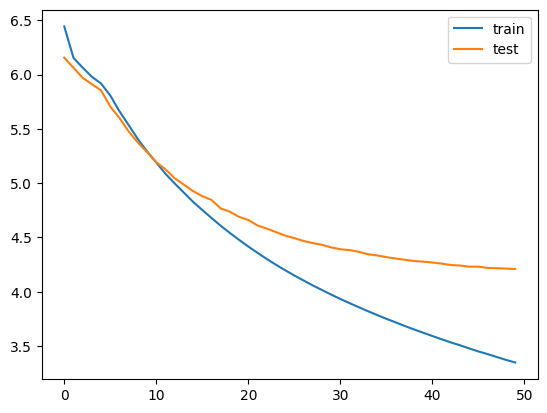

In [38]:
# 학습 중 기록된 손실 그래프를 그림, history객체에는 각 에포크마다 손실값이 저장되어 있으며,
# 이를 이용해 트레이닝 손실과 검증 손실을 시각화함.
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 위 코드는 어텐션 매커니즘을 통해 모델이 입력 시퀀스의 중요한 부분에 더 집중할 수 있도록
# 하여 번역 성능을 향상시키는 것을 목표로 함. 어텐션 매커니즘은 디코더가 각 출력 단어를
# 생성할 때 인코더의 모든 상태를 고려할 수 있게 해줌.

In [39]:
# src_tokenizer : 소스(원문) 텍스트를 토큰화한 결과를 담고 있는 객체, index_word : 정수 인덱스를 키로 하고 이에 대응하는 단어를 값으로 가지는 딕셔너리
# 이 딕셔너리를 src_index_to_word 변수에 할당함으로써 원문 단어 집합에서 특정 정수에 해당하는 단어를 쉽게 찾을 수 있음.
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
# tar_tokenizer.word_index
# tar_tokonizer는 타겟(요약) 텍스트를 토큰화한 결과를 담고 있는 객체
# word_index 속성은 단어를 키로 하고, 이에 대응하는 정수 인덱스를 값으로 가지는 딕셔너리.
# 이 딕셔너리를 tar_word_to_index 변수에 할당함으로써 요약 단어 집합에서 특정 단어의 정수 인덱스를 쉽게 찾을 수 있게 됨.
# 예를 들어 tar_word_to_index['hello']는 'hello'라는 단어에 대한 정수 인덱스를 반환함.
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
# tar_tokenizer.index_word
# 이 부분은 앞선 두 번째 라인과 동일한 작업을 수행함. 즉, 요약 단어 집합에서 정수 인덱스를
# 키로 하고, 해당 인덱스에 대응하는 단어를 값으로 가지는 딕셔너리를 tar_index_to_word 변수에 할당함.
# 이 변수는 요약 단어 집합에서 특정 정수에 해당하는 단어를 찾는 데 사용됨.
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

# 위 코드는 주로 시퀀스-투-시퀀스 모델링에서 사용되며, 모델의 입력과 출력을 처리할 때 매우 유용함.
# 예를 들어, 모델이 예측한 정수 시퀀스를 원래의 단어로 변환하거나 새로운 텍스트 데이터를 모델에 입력하기 위해
# 단어를 정수로 변환할 때 사용할 수 있음, 이러한 딕셔너리를 통해 단어와 정수 인덱스 간의 매핑을 쉽게 관리할 수 있음.

In [40]:
# 인코더 설계
# encoder_model 이라는 이름의 새로운 모델을 정의함, 이 모델은 인코더의 입력(encoder_inputs)을 받아 인코더의 출력(encoder_outputs)과
# LSTM 레이어의 은닉 상태(state_h)및 셀 상태(state_c)를 출력으로 제공함.
# 이 모델은 인코더 부분만 따로 분리하여 저장하거나 사용할 수 있도록 하기 위한 것. 주로 시퀀스-투-시퀀스 모델에서
# 인코더의 출력을 디코더에 전달할 때 사용함.
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])
# 현재 정의된 모델을 파일로 저장함, 파일 형식은 .keras 확장자를 사용하여 저장됨.
# 이외에도 .h5 형식으로 저장할 수 있지만, 여기서는 .keras 형식으로 저장하는 예시를 듬.
# 이렇게 저장된 모델은 나중에 필요할 때 다시 로드하여 사용할 수 있음.
model.save("encoder_model.keras")
# model.save("encoder_model.h5")

# 이전 시점의 상태들을 저장하는 텐서
# 디코더의 초기 상태를 저장하기 위한 두 개의 입력텐서를 정의함. 각각 텐서는 LSTM의 은닉 상태와
# 셀의 상태를 저장할 수 있도록 hidden_size 차원을 가짐.
# 이 텐서들은 디코더의 이전 상태를 입력으로 받기 위해 사용됨.
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

# 디코더 입력(decoder_inputs)을 임베딩 레이어(dec_emb_layer)를 통해 임베딩 함.
# 이 과정은 디코더의 첫 번째 LSTM레이어에 입력하기 전에 수행됨.
dec_emb2 = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM 레이어를 호출함, 여기서 중요한 점은 initial_state 파라미터를 사용하여 이전 시점의 은닉 상태와 셀 상태를 초기 상태로 사용한다는 것.
# 이 코드는 디코더가 새로운 단어를 예측할 때마다 이전 상태를 유지하면서 새로운 상태를 계산하도록 함, 이는 시퀀스 생성과정에서 매주 중요함.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 위 코드는 인코더와 디코더의 상태를 분리하여 관리하는 방법을 보여줌. 인코더의 출력과 상태를 저장하고 디코더의 초기 상태를 설정하여
# 시퀀스 생성 시 이전 상태를 활용할 수 있도록 함. 이러한 구조는 시퀀스-투-시퀀스 모델에서 문장을 생성할 때 매우 유용함.

In [41]:
# decoder_hidden_state_input는 인코더의 모든 숨겨진 상태를 포함하는 입력 텐서임. 이 텐서의
# 형태는 (max_text_length,hidden_size)로, 최대 텍스트 길이와 LSTM의 은닉 상태 크기를 가짐.
# attn_layer는 이전에 정의된 어텐션 레이어임, 이 레이어는 디코더의 출력(decoder_outputs2)과
# 인코더의 모든 숨겨진 상태(decoder_hidden_state_input)를 입력으로 받아 어텐션 결과를 반환함.
decoder_hidden_state_input = Input(shape=(max_text_length, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
# Concatenate 레이어를 사용하여 디코더의 출력과 어텐션 결과를 결합함. axis=-1은 마지막 축을
# 기준으로 텐서를 결합한다는 의미임. 이렇게 결합된 텐서는 디코더의 다음 출력층으로 전달됨.
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# decoder_softmax_layer는 이전에 정의된 밀집층(dense layer)으로, 소프트맥스 활성화 함수를 사용하여
# 각 단어의 확률을 출력함. 이 레이어는 결합된 텐서를 입력으로 받아 디코더의 최종 출력을 생성함.
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# decoder_model이라는 이름의 모델을 정의함, 이 모델은 디코더 입력(decoder_inputs), 인코더의 숨겨진 상태(decoder_hidden_state_input), 그리고
# 이전 시점의 은닉 상태와 셀 상태(decoder_state_input_h,decoder_state_input_c)를 입력으로 받음.
# 출력은 디코더의 예측값(decoder_outputs2)과 다음 시퀀스를 위해 필요한 은닉 상태와 셀 상태(state_h2,state_c2)임.
# 이 모델은 시퀀스 생성 시 이전 상태를 유지하면서 새로운 단어를 예측하는데 사용됨.
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
# 최종적으로 정의된 디코더 모델을 파일로 저장함. 파일 이름은 decoder_model.keras임. 이 모델은 나중에 필요할 때 로드하여 사용할 수 있음.
model.save("decoder_model.keras")

# 이 코드는 어텐션 매커니즘을 통합한 디코더 모델을 정의하여, 인코더의 모든 상태를 고려하면서 디코더가 문장을 생성할 수 있도록 함.
# 이 구조는 시퀀스-투-시퀀스 모델에서 문장 번역이나 요약 등의 작업에 매우 유용함.

In [42]:
# 이 함수는 주어진 입력 시퀀스를 기반으로 시퀀스-투-시퀀스 모델의 디코더를 사용하여 예측된 출력 시퀀스(즉, 요약 또는 번역된 문장)를
# 생성하는 과정을 구현함.
def decode_sequence(input_seq):
    # 1. 입력 시퀀스에서 인코더 상태 얻기
    # input_seq는 인코더 모델에 입력할 시퀀스
    # encoder_model.predict(input_seq)를 호출하여 인코더의 출력(e_out)과 마지막 LSTM레이어의 은닉 상태(e_h)및 셀 상태(e_c)를 얻음.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # 2. 시작 토큰(SOS) 생성
    # 디코더의 초기 입력 시퀀스를 생성함, (1,1) 형태의 텐서를 만들고, 첫 번째 요소에
    # 시작 토큰(SOS)에 해당하는 인덱스를 설정함.
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    # 3. 루프 초기화
    stop_condition = False # 변수를 언제 멈출지 결정하는 플래그
    decoded_sentence = '' # 예측된 단어를 모아 최종적으로 반환할 요약 문장
    # 4. 문장 생성 루프
    # stop_condition이 True가 될 때까지 루프 반복
    # stop_condition이 False인 동안 루프를 계속 반복, 이 루프는 <eos> 토큰을 생성하거나 최대 요약 길이에 도달할 때까지 실행됨.
    while not stop_condition:
        # 5. 디코더의 출력 예측
        # decoder_model.predict를 호출하여 다음 단어의 확률분포(output_tokens)와 새로운 은닉 상태(h) 및 셀 상태(c)를 얻음.
        # 이때 인코더의 출력(e_out)과 이전 상태(e_h,e_c)를 함께 입력으로 전달함.
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        # 6. 샘플링된 토큰 인덱스 및 문자열 얻기
        # np.argmax를 사용하여 가장 높은 확률을 가진 단어의 인덱스를 찾음.
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # 해당 인덱스를 tar_index_to_word 딕셔너리를 통해 실제 단어로 변환함.
        sampled_token = tar_index_to_word[sampled_token_index]

        # 7. 결과 문장 업데이트
        # 만약 샘플링된 토큰이 <eos>토큰이 아니라면, 이를 decoded_sentence에 추가함.
        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        # 8. 종료 조건 확인
        # 만약 <eos> 토큰이 생성되었거나, decoded_sentence의 길이가 최대 요약 길이보다 크거나 같다면 루프를 종료함.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (max_summary_length-1)):
            stop_condition = True

        # 9. 타겟 시퀀스 업데이트
        # 다음 예측을 위해 target_seq를 업데이트함, 현재 샘플링된 토큰의 인덱스를 사용함.
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 10. 상태 업데이트
        # 인코더의 상태를 새로운 은닉 상태와 셀 상태로 업데이트함.
        e_h, e_c = h, c

    # 11. 결과 반환
    # 최종적으로 생성된 문장을 반환함.
    return decoded_sentence

# 이 함수는 주어진 입력 시퀀스를 인코더에 넣어 얻은 상태를 바탕으로 디코더를 사용하여 문장을 생성함.
# 이 과정에서 어텐션 매커니즘을 활용하여 인코더의 모든 상태를 고려하며, <eos>토큰이나 최대 길이에 도달할 때까지
# 단어를 예측하고 문장을 완성함.

In [43]:
# 1. 원문의 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수
# seq2txt함수는 정수 시퀀스(input_seq)를 입력으로 받아, 이를 원문 텍스트로 변환
def seq2text(input_seq):
    # 변수 초기화 : 빈 문자열 temp를 초기화
    temp=''
    # 반복문 : 입력 시퀀스를 순회하면서 각 정수를 단어로 변환함.
    # if(i!=0): 0이 아닌 정수만 처리함, 0은 보통 패딩(padding)토큰을 나타내므로
    # 이를 제외함.
    # temp = '~' : 현재 정수 i에 해당하는 단어를 src_index_to_word 딕셔너리를 통해 찾고
    # 이를 temp에 추가함, 각 단어 사이에는 공백을 추가함.
    # 문자열 정리 : strip() 메소드를 사용하여 결과 문자열의 앞뒤 공백을 제거한 후 반환함.
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp.strip()

# 2. 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수
# 함수정의 : seq2summary 함수는 정수 시퀀스(input_seq)를 입력으로 받아 이를 요약문 텍스트로 변환함
def seq2summary(input_seq):
    # 빈 문자열 temp를 초기화함.
    temp = ''
    # 입력 시퀀스를 순회하면서 각 정수를 단어로 변환함.
    for i in input_seq:
        # 0,시작 토큰(SOS), 종료 토큰(EOS)을 제외한 정수만 처리함, 이 세 토큰은 시퀀스의 시작과 끝을 나타내므로
        # 이를 제외함.
        if i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']:
            temp += tar_index_to_word[i] + ' '  # 현재 정수 i에 해당하는 단어를 tar_index_to_word 딕셔너리를 통해 찾고, 각 단어 사이에는 공백을 추가함.
    # strip() 메소드를 사용하여 결과 문자열의 앞뒤 공백을 제거한 후 반환함.
    return temp.strip()
# 위 두 함수는 주로 모델의 예측 결과를 해석하거나, 데이터셋을 전처리할 때 사용함, 정수 시퀀스를 사람이 읽을 수 있는 텍스트 형태로
# 변환하는데 유용하며, 특히 시퀀스-투-시퀀스 모델링에서 많이 사용됨. 예를 들어, 모델이 예측한 정수 시퀀스를 입력으로 받아, 이를 원문이나 요약문으로 변환할 때 사용함.

In [44]:
# for루프는 50번째부터 99번째까지 샘플에 대해 반복함. 즉, 총50개의 샘플을 처리함.
for i in range(50, 100):
    # seq2text 함수를 사용하여 입력 텍스트 데이터의 i번째 요소를 정수 시퀀스에서 텍스트로 변환함, 변환된 원문을 출력함.
    print("원문 :", seq2text(encoder_input_test[i]))
    # seq2summary 함수를 사용하여 디코더 입력 테스트 데이터의 i번째 요소를 정수 시퀀스에서 텍스트로 변환함, 변환된 실제 요약을 출력함.
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    # decode_sequence 함수를 호출하여 encoder_input_test[i]의 i번째 인코더 입력을 기반으로 예측된 요약을 생성함, 생성된 예측 요약을 출력함.
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, max_text_length)))
    # 각 샘플의 결과를 구분하기 위해 빈 줄을 출력함.
    print("\n")

# 위 코드는 모델의 성능을 시각적으로 평가하기 위한 것으로, 주어진 입력에 대해 실제 요약과 모델이 예측한 요약을 비교할 수 있게 해줌.
# 이를 통해 모델의 예측 정확도와 문제점을 쉽게 파악할 수 있음, 특히 몇 가지 샘플을 출력하여 모델의 출력이 얼마나 정확한지 직관적으로 확인할 수 있음.

원문 : punjab cabinet monday cleared proposal set international civil terminal air force station ludhiana district punjab government provide acres land free charge terminal terminal jointly developed state government airports authority india
실제 요약 : international airport to come up in punjab ludhiana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
예측 요약 :  govt to be for air india


원문 : vidya balan member censor board decided part screenings films produced husband siddharth roy kapur star brothers law aditya move welcomed board members source quoted saying
실제 요약 : not to be part of cbfc screening of husband films
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━

In [45]:
# requests 모듈을 사용하여 웹에서 데이터를 가져올 수 있게 함.
# summarize 함수는 텍스트를 요약하는 기능을 제공하며 summa라이브러리에서 가져옴.
import requests
from summa.summarizer import summarize

In [46]:
# requests.get 메소드를 사용하여 지정된 url에서 텍스트 파일을 다운로드함.
# URL은 Github의 Raw파일을 가리키고 있으며, 파일 이름은 Avengers.txt임.
# 다운로드한 텍스트는 text변수에 저장됨.
text = requests.get('https://raw.githubusercontent.com/dev-ranger/sample_string/refs/heads/main/Avengers.txt').text

In [47]:
# 다운로드한 텍스트의 처음 1500자를 출력하여 내용을 확인함.
print(text[:1500])

The Tesseract has awakened.
It is on a neutral world, a human world.
They wield its power,
but our ally knows it's working, so that they never will learn.
He's ready to lead, and our force, our Chitauri will follow.
The world will be his and the universe yours.
And the humans, what can they do, but burn.
How bad is it?
That's the problem, sir. We don't know.
Dr. Selvig read an energy surge from the Tesseract four hour ago.
NASA didn't authorize Selvig to pull the test phase.
He wasn't testing it, he wasn't even in the room. Spontaneous advancement
It just turned itself on?
What are the engine levels now?
Climbing. When Selvig couldn't shut it down, we ordered the evac.
How long to get everyone out?
Campus should be clear in the next half hour.
Do better.
Sir, evacuation maybe futile.
We should tell them to go back to sleep?
If we can't control the Tesseract's energy,
there may not be a minimum safe distance.
I need you to make sure that phase
Sir, is that really a priority right now?
U

In [48]:
# summarize 함수를 사용하여 텍스트를 요약함.(단일요약)
print('Summary:')
# ratio=0.005는 요약된 텍스트가 전체 텍스트의 0.5%를 차지하도록 설정함, 그리고 요약된 결과를 출력함.
print(summarize(text, ratio=0.005))

Summary:
- I wanna know why Loki let us take him.
And I'd like to know how Loki used it to
You think you can make Loki tell us what the Tesseract is?
I'd like to know why SHIELD is using the Tesseract to build weapons of mass destruction.
I didn't need to know.
Loki's gonna keep this fight focused on us and that's what we need.
We got Stark up top, he's gonna need us...


In [49]:
# split=True 옵션을 추가하여 요약된 텍스트를 여러 문장으로 분할함(여러 문장으로 분할)
print('Summary:')
# 요약된 결과를 출력함.
print(summarize(text, ratio=0.005, split=True))

Summary:
['- I wanna know why Loki let us take him.', "And I'd like to know how Loki used it to", 'You think you can make Loki tell us what the Tesseract is?', "I'd like to know why SHIELD is using the Tesseract to build weapons of mass destruction.", "I didn't need to know.", "Loki's gonna keep this fight focused on us and that's what we need.", "We got Stark up top, he's gonna need us..."]


In [50]:
# 단어 수 기반 요약 출력, word=50 옵션을 사용하여 요약된 텍스트가 정확히 50단어가 되도록 함.
print('Summary:')
# 요약된 결과를 출력함.
print(summarize(text, words=50))

# 위 코드는 웹에서 텍스트 파일을 다운로드하고, 다양한 방법으로 텍스트를 요약하는 과정을 보여줌.
# summa 라이브러리의 summarize함수를 사용하여 간단하게 텍스트를 요약할 수 있으며 요약 방식(비율 기반 또는 단어수 기반)을
# 선택할 수 있음. 이를 통해 텍스트의 핵심 내용을 빠르게 파악할 수 있음.

Summary:
- I wanna know why Loki let us take him.
And I'd like to know how Loki used it to
You think you can make Loki tell us what the Tesseract is?
I didn't need to know.
We got Stark up top, he's gonna need us...
